In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv('vgsales.csv')
df

,Rank,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
0,1,Wii Sports,Wii,2006.0,Sports,Nintendo,41.49,29.02,3.77,8.46,82.74
1,2,Super Mario Bros.,NES,1985.0,Platform,Nintendo,29.08,3.58,6.81,0.77,40.24
2,3,Mario Kart Wii,Wii,2008.0,Racing,Nintendo,15.85,12.88,3.79,3.31,35.82
3,4,Wii Sports Resort,Wii,2009.0,Sports,Nintendo,15.75,11.01,3.28,2.96,33.00
4,5,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,Nintendo,11.27,8.89,10.22,1.00,31.37
...,...,...,...,...,...,...,...,...,...,...,...
16593,16596,Woody Woodpecker in Crazy Castle 5,GBA,2002.0,Platform,Kemco,0.01,0.00,0.00,0.00,0.01
16594,16597,Men in Black II: Alien Escape,GC,2003.0,Shooter,Infogrames,0.01,0.00,0.00,0.00,0.01
16595,16598,SCORE International Baja 1000: The Official Game,PS2,2008.0,Racing,Activision,0.00,0.00,0.00,0.00,0.01
16596,16599,Know How 2,DS,2010.0,Puzzle,7G//AMES,0.00,0.01,0.00,0.00,0.01


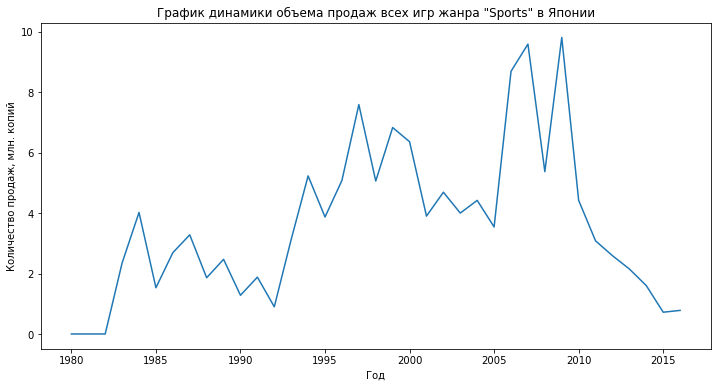

In [22]:
# Задание 1
fig, ax = plt.subplots(figsize=(12, 6))

data = df[df['Genre'] == 'Sports'].groupby('Year').agg('sum')

ax.plot(data.index, data['JP_Sales'])

ax.set_title('График динамики объема продаж всех игр жанра "Sports" в Японии')
ax.set_xlabel('Год')
ax.set_ylabel('Количество продаж, млн. копий')

plt.show()

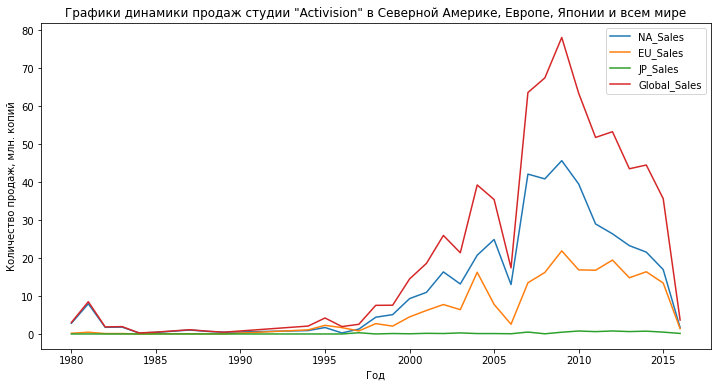

In [33]:
# Задание 2
fig, ax = plt.subplots(figsize=(12, 6))

data = df[df['Publisher'] == 'Activision'].groupby('Year').agg('sum')

ax.plot(data.index, data['NA_Sales'], label='NA_Sales')
ax.plot(data.index, data['EU_Sales'], label='EU_Sales')
ax.plot(data.index, data['JP_Sales'], label='JP_Sales')
ax.plot(data.index, data['Global_Sales'], label='Global_Sales')

ax.set_title('Графики динамики продаж студии "Activision" в Северной Америке, Европе, Японии и всем мире')
ax.set_xlabel('Год')
ax.set_ylabel('Количество продаж, млн. копий')

plt.legend()
plt.show()

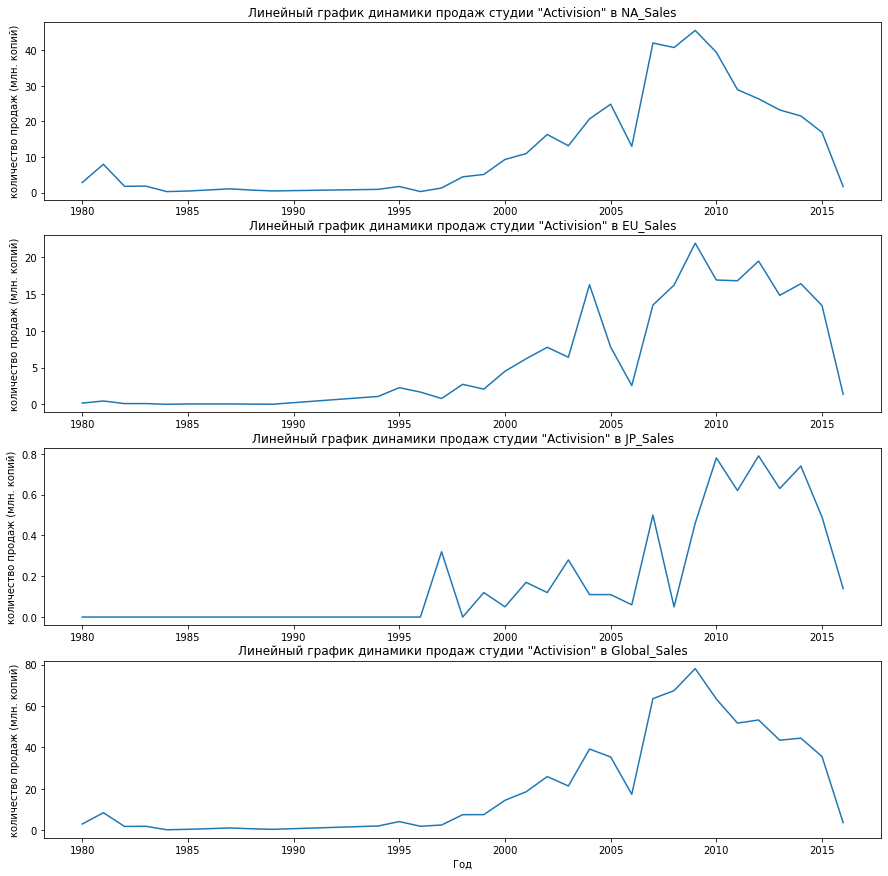

In [42]:
# Задание 3
fig, axs = plt.subplots(nrows=4, ncols=1, figsize=(15, 15))

data = df[df['Publisher'] == 'Activision'].groupby('Year').agg('sum')[['NA_Sales', 'EU_Sales', 'JP_Sales', 'Global_Sales']]

for i, elem in enumerate(data.columns):
    ax = axs[i]
    ax.plot(data.index, data[elem], label=elem)
    ax.set_title('Линейный график динамики продаж студии "Activision" в ' + elem)
    ax.set_ylabel('количество продаж (млн. копий)')
    
    if i == len(data.columns) - 1:
        ax.set_xlabel('Год')

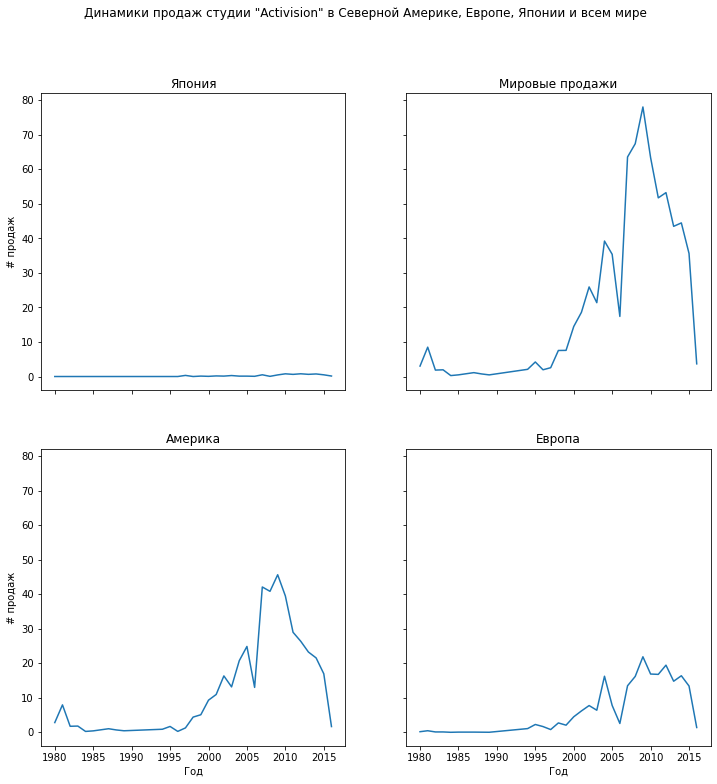

In [74]:
# Задание 4
fig, axs = plt.subplots(nrows=2, ncols=2, figsize=(12, 12), sharey=True, sharex=True)

a = [0, 1]
b = [0, 1]

data = df[df['Publisher'] == 'Activision'].groupby('Year').agg('sum')[['JP_Sales', 'Global_Sales', 'NA_Sales', 'EU_Sales']]

for i in a:
    for j in b:
        if i == 0 and j == 0:
            ax = axs[i][j]
            [[ax.plot(data.index, data[elem]), ax.set_title('Япония')] for k ,elem in enumerate(data.columns) if k == 0]
            ax.set_ylabel('# продаж')
        elif i == 0 and j == 1:
            ax = axs[i][j]
            [[ax.plot(data.index, data[elem]), ax.set_title('Мировые продажи')] for k, elem in enumerate(data.columns) if k == 1]
        elif i == 1 and j == 0:
            ax = axs[i][j]
            [[ax.plot(data.index, data[elem]), ax.set_title('Америка')] for k, elem in enumerate(data.columns) if k == 2]
            ax.set_xlabel('Год')
            ax.set_ylabel('# продаж')
        elif i == 1 and j == 1:
            ax = axs[i][j]
            [[ax.plot(data.index, data[elem]), ax.set_title('Европа')] for k, elem in enumerate(data.columns) if k == 3]
            ax.set_xlabel('Год')

fig.suptitle('Динамики продаж студии "Activision" в Северной Америке, Европе, Японии и всем мире')
plt.show()

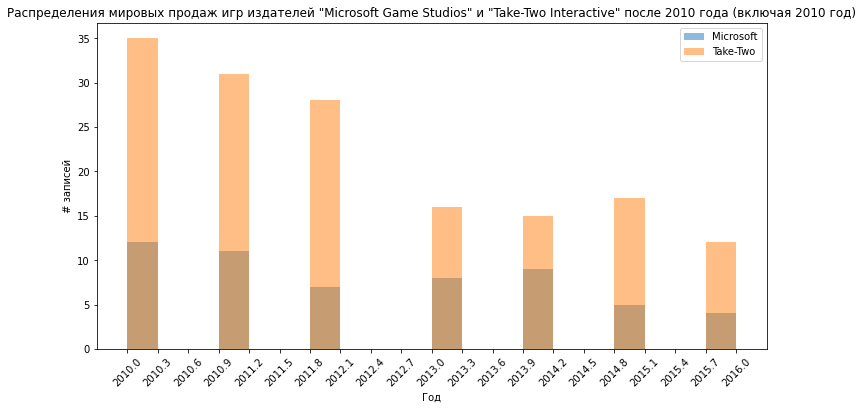

In [40]:
# Задание 5
fig, ax = plt.subplots(figsize=(12, 6))

data = df[(df['Publisher'] == 'Microsoft Game Studios') & (df['Year'] >= 2010)]['Year']
data1 = df[(df['Publisher'] == 'Take-Two Interactive') & (df['Year'] >= 2010)]['Year']

_, bins, _ = ax.hist(data, bins=20, alpha=0.5, label='Microsoft')
ax.hist(data1, bins=20, alpha=0.5, label='Take-Two')

ax.set_xticks(list(bins))
ax.tick_params(axis='x', rotation=45)

ax.set_title('Распределения мировых продаж игр издателей "Microsoft Game Studios" и "Take-Two Interactive" после 2010 года (включая 2010 год)')
ax.set_xlabel('Год')
ax.set_ylabel('# записей')

plt.legend()
plt.show()

Text(0, 0.5, 'Количество продаж (млн. копий)')

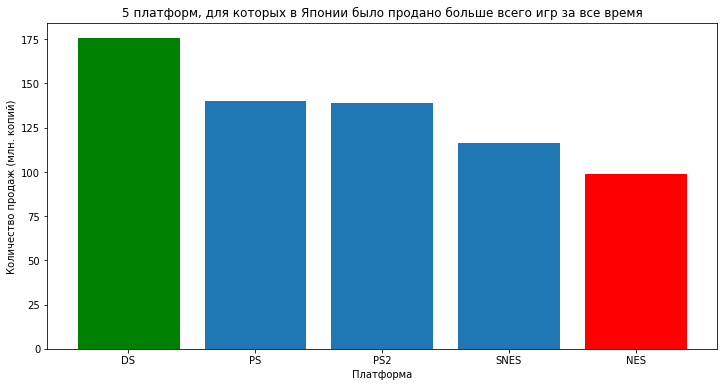

In [182]:
# Задание 6
fig, ax = plt.subplots(figsize=(12, 6))

data = df.groupby('Platform').agg('sum').sort_values('JP_Sales', ascending=False).head()

bar_list = plt.bar(data.index, data['JP_Sales'])
bar_list[0].set_color('green')
bar_list[4].set_color('red')

ax.set_title('5 платформ, для которых в Японии было продано больше всего игр за все время')
ax.set_xlabel('Платформа')
ax.set_ylabel('Количество продаж (млн. копий)')

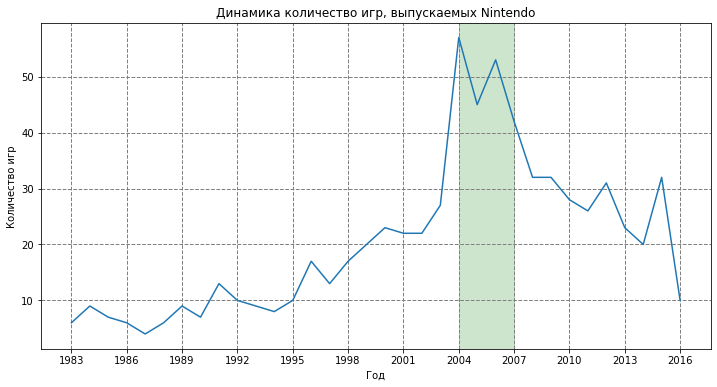

In [48]:
# Задание 7
fig, ax = plt.subplots(figsize=(12, 6))


nin = df[df['Publisher'] == 'Nintendo'].groupby('Year').count()['Name'].reset_index()

ax.plot(nin['Year'].astype('int64'), nin['Name'])
ax.set_title('Динамика количество игр, выпускаемых Nintendo')
ax.set_xlabel('Год')
ax.set_ylabel('Количество игр')
ax.set_xticks(list(range(nin['Year'].astype('int64').min(), nin['Year'].astype('int64').max(), 3)) + [nin['Year'].astype('int64').max()])
ax.axvspan(xmin=nin[nin['Name'] > 35].iloc[0, 0], xmax=nin[nin['Name'] > 35].iloc[-1, 0], color='green', alpha=0.2)
ax.grid(linewidth=1, color='gray', linestyle='--')
plt.show()

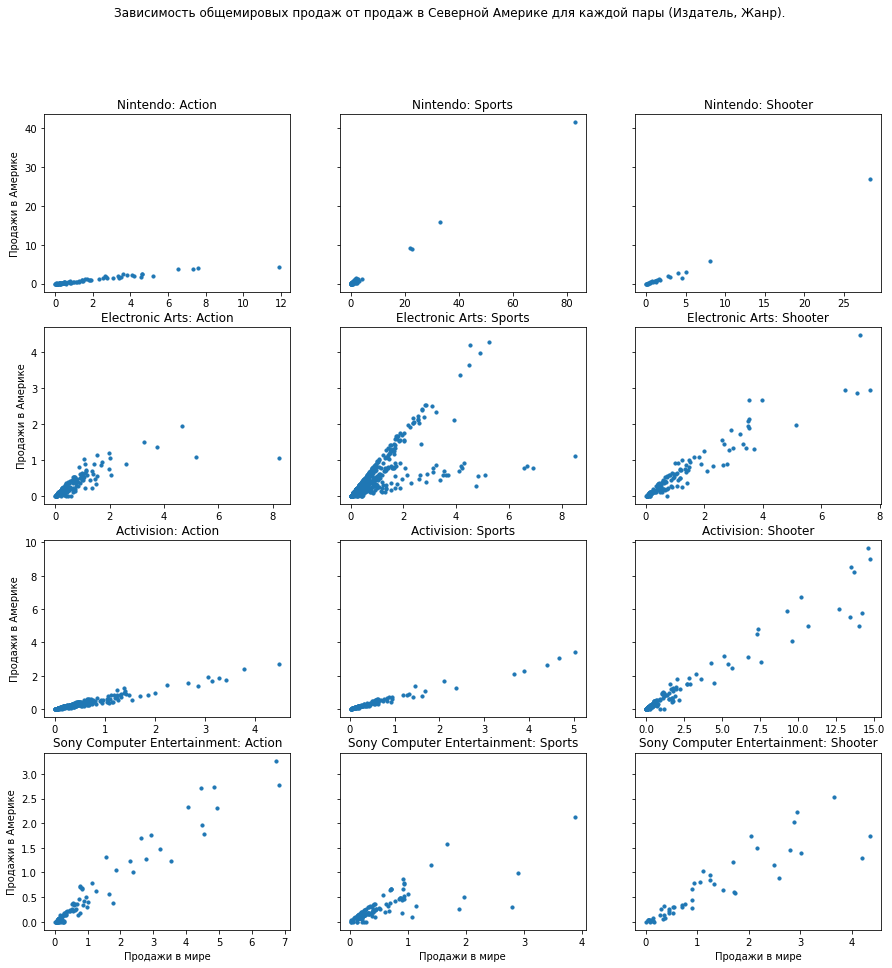

In [77]:
# Задача 8
fig, axs = plt.subplots(nrows=4, ncols=3, figsize=(15, 15), sharey='row')

genres = ['Action', 'Sports', 'Shooter']
publishers = ['Nintendo', 'Electronic Arts', 'Activision', 'Sony Computer Entertainment']

fig.suptitle('Зависимость общемировых продаж от продаж в Северной Америке для каждой пары (Издатель, Жанр).')

for i in range(len(publishers)):
    for j in range(len(genres)):
        sales = df[(df['Publisher'] == publishers[i]) & (df['Genre'] == genres[j])]
        axs[i][j].scatter(sales['Global_Sales'], sales['NA_Sales'], s=10)
        
        axs[i][j].set_title(publishers[i] + ': ' + genres[j])
        if publishers[i] == 'Sony Computer Entertainment':
            axs[i][j].set_xlabel('Продажи в мире')
        if genres[j] == 'Action':
            axs[i][j].set_ylabel('Продажи в Америке')
